In [57]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

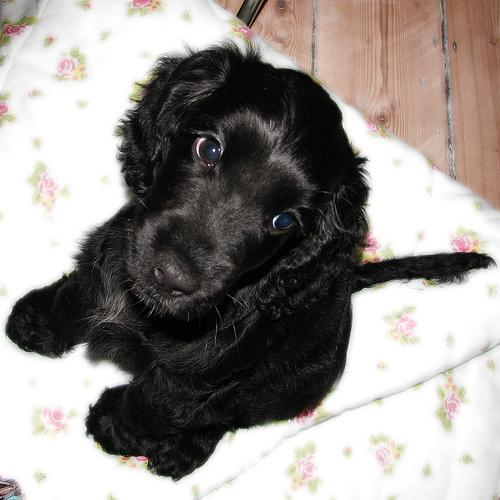

In [16]:
cocker_spaniel=[]
for file in os.listdir('input/data/images/Images/n02067589-Cocker_Spaniel/'):
    im = Image.open('input/data/images/Images/n02067589-Cocker_Spaniel/' + file)
    cocker_spaniel.append(im)
display(random.choice(cocker_spaniel))

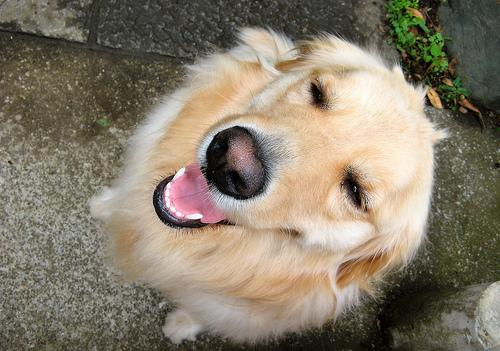

In [17]:
golden_retriever=[]
for file in os.listdir('input/data/images/Images/n02073948-golden_retriever/'):
    im = Image.open('input/data/images/Images/n02073948-golden_retriever/' + file)
    golden_retriever.append(im)
display(random.choice(golden_retriever))

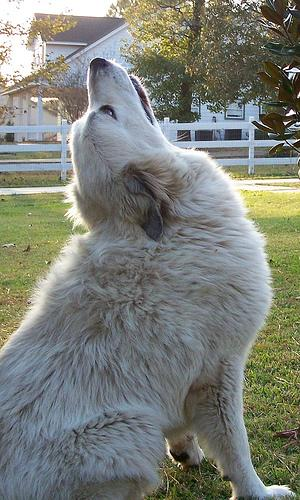

In [25]:
great_pyrenees=[]
for file in os.listdir('input/data/images/Images/n02054938-great_pyrenees/'):
    im = Image.open('input/data/images/Images/n02054938-great_pyrenees/' + file)
    great_pyrenees.append(im)
display(random.choice(great_pyrenees))

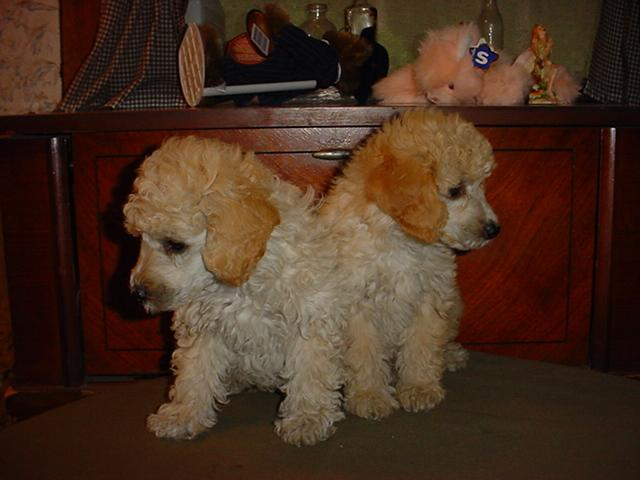

In [23]:
mini_poodle=[]
for file in os.listdir('input/data/images/Images/n02054839-mini_poodle/'):
    im = Image.open('input/data/images/Images/n02054839-mini_poodle/' + file)
    mini_poodle.append(im)
display(random.choice(mini_poodle))

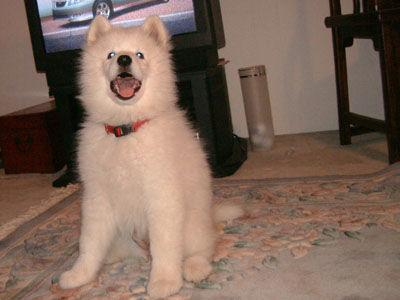

In [32]:
samoyed=[]
for file in os.listdir('input/data/images/Images/n0250839-samoyed/'):
    im = Image.open('input/data/images/Images/n0250839-samoyed/' + file)
    samoyed.append(im)
display(random.choice(samoyed))

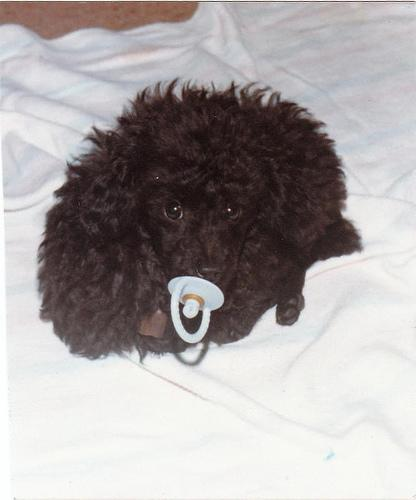

In [33]:
toy_poodle=[]
for file in os.listdir('input/data/images/Images/n0304958-toy_poodle/'):
    im = Image.open('input/data/images/Images/n0304958-toy_poodle/' + file)
    toy_poodle.append(im)
display(random.choice(toy_poodle))

Preparing images...

for i in [cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]:
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.LANCZOS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.LANCZOS)

def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

training_data('cocker_spaniel', 'input/data/images/Images/n02067589-Cocker_Spaniel')
training_data('golden_retriever','input/data/images/Images/n02073948-golden_retriever/')
training_data('great_pyrenees', 'input/data/images/Images/input/data/images/Images/n02054938-great_pyrenees/')
training_data('toy_poodle','input/data/images/Images/input/data/images/Images/n0304958-toy_poodle/')
training_data('mini_poodle', 'input/data/images/Images/input/data/images/Images/n02054839-mini_poodle/')
training_data('samoyed', 'input/data/images/Images/input/data/images/Images/n0250839-samoyed/')

In [ ]:
images = []
for i in [cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]:
    images.append(random.choice(i))

height = max(8, int(len(images)/5) * 8)
plt.figure(figsize=(18, 12))

for i, image in enumerate(images):
    plt.subplot(int(len(images) / 5 + 1), 5, i + 1)
    plt.imshow(image)

class_names=[cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
current code

x = []
y = []

for i in [cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]:
    for j in range(len(i)):
        ar = np.asarray(i[j])
        x.append(ar)
x = np.array(x)

        
for i in range(6):
    lists = [cocker_spaniel, golden_retriever, great_pyrenees, toy_poodle, mini_poodle, samoyed]
    names = ['cocker_spaniel', 'golden_retriever', 'great_pyrenees', 'toy_poodle', 'mini_poodle', 'samoyed']
    for j in range(len(lists[i])):
        y.append(names[i])
        
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
#CURRENT CODE

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
#CURRENT CODE

model = Sequential()
model.add(Conv2D(28, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(56, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(112, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(224, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(448, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(896, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(28, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [67]:
#CURRENT CODE
datagen = ImageDataGenerator(
      rescale=1./255.,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train, batch_size=1)

test = test_datagen.flow(
        x_test, y_test,
        batch_size=1)

history = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
941/941 [==============================] - 53s 57ms/step - loss: 1.7793 - accuracy: 0.2030 - val_loss: 1.7789 - val_accuracy: 0.2095
Epoch 2/10
941/941 [==============================] - 35s 37ms/step - loss: 1.7793 - accuracy: 0.2094 - val_loss: 1.7788 - val_accuracy: 0.2095
Epoch 3/10
941/941 [==============================] - 36s 38ms/step - loss: 1.7794 - accuracy: 0.1923 - val_loss: 1.7788 - val_accuracy: 0.2095
Epoch 4/10
941/941 [==============================] - 36s 38ms/step - loss: 1.7793 - accuracy: 0.2062 - val_loss: 1.7788 - val_accuracy: 0.2095
Epoch 5/10
941/941 [==============================] - 35s 38ms/step - loss: 1.7793 - accuracy: 0.1987 - val_loss: 1.7788 - val_accuracy: 0.2095
Epoch 6/10
941/941 [==============================] - 36s 38ms/step - loss: 1.7795 - accuracy: 0.2083 - val_loss: 1.7788 - val_accuracy: 0.2095
Epoch 7/10
941/941 [==============================] - 37s 40ms/step - loss: 1.7789 - accuracy: 0.2157 - val_loss: 1.7789 - val_accuracy:

KeyboardInterrupt: 